In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
data = sio.loadmat("./pinn_case_a.mat")
x = data["x_test"]
u = data["u_pred"]

In [3]:
u.shape

(1000, 201, 1)

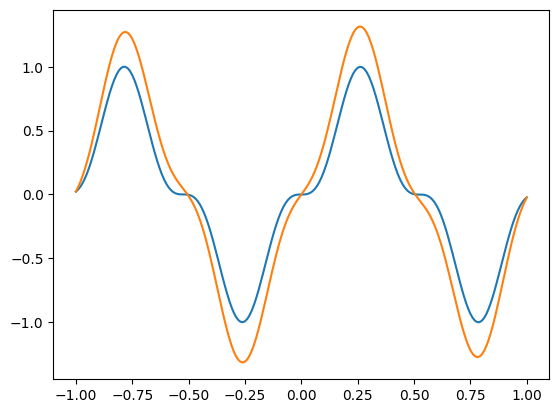

In [4]:
idx1 = 715
idx2 = 253

plt.plot(x, u[idx1])
plt.plot(x, u[idx2])
plt.show()

In [5]:
from pysr import PySRRegressor

model = PySRRegressor(
    maxsize=20,
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

[juliapkg] Found dependencies: c:\users\zouzo\anaconda3\envs\tf2\lib\site-packages\juliacall\juliapkg.json
[juliapkg] Found dependencies: c:\users\zouzo\anaconda3\envs\tf2\lib\site-packages\pysr\juliapkg.json
[juliapkg] Found dependencies: c:\users\zouzo\anaconda3\envs\tf2\lib\site-packages\juliapkg\juliapkg.json
[juliapkg] Locating Julia ~1.6.7, ~1.7, ~1.8, ~1.9, =1.10.0
[juliapkg] Using Julia 1.9.3 at C:\Users\zouzo\AppData\Local\Programs\Julia-1.9.3\bin\julia.EXE
[juliapkg] Using Julia project at C:\Users\zouzo\anaconda3\envs\tf2\julia_env
[juliapkg] Installing packages:
           julia> import Pkg
           julia> Pkg.Registry.update()
           julia> Pkg.add([Pkg.PackageSpec(name="PythonCall", uuid="6099a3de-0909-46bc-b1f4-468b9a2dfc0d"), Pkg.PackageSpec(name="SymbolicRegression", uuid="8254be44-1295-4e6a-a16d-46603ac705cb"), Pkg.PackageSpec(name="Serialization", uuid="9e88b42a-f829-5b0c-bbe9-9e923198166b")])
           julia> Pkg.resolve()
           julia> Pkg.precompile()
D

In [7]:
model.fit(x.reshape([-1, 1]), u[idx1].reshape([-1, 1]))

C:\Users\zouzo\anaconda3\envs\tf2\lib\site-packages\pysr\sr.py:1303: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  "Note: it looks like you are running in Jupyter. "


Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 7.950e+04
Head worker occupation: 21.8%
Progress: 165 / 600 total iterations (27.500%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           3.260e-01  7.971e+00  y = sin(3.1418)
3           2.860e-01  1.307e-01  y = -0.34439 * x0
4           6.003e-02  1.561e+00  y = sin(6.1815 * x0)
5           4.821e-02  2.192e-01  y = sin(sin(6.1854 * x0))
6           3.174e-02  4.181e-01  y = sin(x0 * 6.1817) * 0.77828
7           3.107e-02  2.116e-02  y = sin(x0 * 6.1062) * sin(0.86196)
10          1.711e-02  1.989e-01  y = cos(cos(x0 * 6.1062)) * sin(x0 * 6.1062)
11          1.504e-02  1.291e-01  y = sin(cos(cos(6.1062 * x0))) * sin(x0 * 6.1062)
12          6.830e-03  7.891e-01  y = sin(6.1853 * x0) * cos(cos(x0 * 6.1853) * 1.3626)
13          3.538e-03  6.576e-01  y = sin(6.1853 * sin(x0)) * cos(cos(x0 * 6.1853) * 1.3626)
18          2.672e-03  5.6

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                         -0.5413011   
	1         0.641136                                     sin(3.1417844)   
	2         0.130655                                   -0.34438714 * x0   
	3         1.561344                                sin(6.1815434 * x0)   
	4         0.219214                           sin(sin(6.1853523 * x0))   
	5         0.439295                    sin(x0 * 6.106227) * 0.75911134   
	6         0.182481      cos(cos(5.5883446 * x0)) * sin(6.306751 * x0)   
	7         0.023730  sin(6.1070333 * x0) * sin(cos(cos(6.004944 * x...   
	8         4.485921  cos(cos(x0 * 5.9820285) * -1.519314) * sin(6.0...   
	9         0.183198  sin(x0 * 6.0592403) * cos((-1.2220764 * cos(5....   
	10        0.017566  cos(cos(x0 * 5.987993) * (cos(5.810584) + cos(...   
	11  >>>>  0.908692  sin(6.031766 * x0) * cos(sin(cos(x0 * 5.982028...   
	
	      